In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn

from spectrum_conversion import *
from plot import *
from util import *

%matplotlib inline


/home/cali/bin/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
# IASI_F_NYQUIST = 6912.0  # 频带宽度  cm-1
# IASI_RESAMPLE_MAXX = [2.0, 2.0, 2.0]  # cm OPD
# IASI_D_FREQUENCY = [0.25, 0.25, 0.25]  # v cm-1  光谱分辨率
# IASI_BAND_F1 = [645.00, 1210.00, 2000.0]  # 光谱带开始
# IASI_BAND_F2 = [1209.75, 1999.75, 2760.0]  # 光谱带结束
# IASI_FILTER_WIDTH = [20.0, 20.0, 20.0]  # 过滤的波长

# CRIS_F_NYQUIST = 5875.0
# CRIS_RESAMPLE_MAXX = [0.8, 0.8, 0.8]
# CRIS_D_FREQUENCY = [0.625, 0.625, 0.625]
# CRIS_BAND_F1 = [650.00, 1210.00, 2155.0]
# CRIS_BAND_F2 = [1095.00, 1750.00, 2550.0]
# CRIS_FILTER_WIDTH = [20.0, 20.0, 20.0]


# IASI_F_NYQUIST = 6912.0  # 频带宽度  cm-1
# IASI_RESAMPLE_MAXX = [2.0, 2.0, 2.0]  # cm OPD
# IASI_D_FREQUENCY = [0.25, 0.25, 0.25]  # v cm-1  光谱分辨率
# IASI_BAND_F1 = [645.00, 1180.00, 1970.0]  # 光谱带开始
# IASI_BAND_F2 = [1240, 2030, 2790.0]  # 光谱带结束
# IASI_FILTER_WIDTH = [20.0, 20.0, 20.0]  # 过滤的波长

# ## CRIS

# CRIS_F_NYQUIST = 5875.0
# CRIS_RESAMPLE_MAXX = [0.8, 0.8, 0.8]
# CRIS_D_FREQUENCY = [0.625, 0.625, 0.625]
# CRIS_BAND_F1 = [650.00, 1210.00, 2155.0]
# CRIS_BAND_F2 = [1095.00, 1750.00, 2550.0]
# CRIS_FILTER_WIDTH = [20.0, 20.0, 20.0]

# ## IASI-full

IASI_F_NYQUIST = 6912.0  # 频带宽度  cm-1
IASI_RESAMPLE_MAXX = [2.0, ]  # cm OPD
IASI_D_FREQUENCY = [0.25, ]  # v cm-1  光谱分辨率
IASI_BAND_F1 = [645.0, ]  # 光谱带开始
IASI_BAND_F2 = [2755.0, ]  # 光谱带结束
IASI_FILTER_WIDTH = [20.0, ]  # 过滤的波长

# ## CRIS-full

CRIS_F_NYQUIST = 5875.0
CRIS_RESAMPLE_MAXX = [0.8, ]
CRIS_D_FREQUENCY = [0.625, ]
CRIS_BAND_F1 = [650.0, ]
CRIS_BAND_F2 = [2755.0, ]
CRIS_FILTER_WIDTH = [20.0, ]

In [3]:
ibands_lbl = [0, 1, 2]  # band 1、 2 or 3，光谱带
LBL_DATA_DIR = '/home/cali/data/LBL'
_data1 = os.path.join(LBL_DATA_DIR, 'iasiB1_metop-a_lbl_radSpectrum.nc')
_data2 = os.path.join(LBL_DATA_DIR, 'iasiB2_metop-a_lbl_radSpectrum.nc')
_data3 = os.path.join(LBL_DATA_DIR, 'iasiB3_metop-a_lbl_radSpectrum.nc')
LBL_DATA_FILES = [_data1, _data2, _data3]

LBL_BEGIN_FREQUENCY = 600.0
LBL_END_FREQUENCY = 2800.0
LBL_FREQUENCY_INTERVAL = 0.001

_max = [0, 1250, 2040]

spec_lbl = list()
for iband in ibands_lbl:
    data = read_lbl_nc(LBL_DATA_FILES[iband])

    rad_lbl = data['SPECTRUM'].reshape(-1) * 1e7
    bf_lbl = data['BEGIN_FREQUENCY']
    ef_lbl = data['END_FREQUENCY']
    df_lbl = data['FREQUENCY_INTERVAL']

    wavenumber_lbl_band = np.arange(0, len(rad_lbl), dtype=np.float64) * df_lbl + bf_lbl
    spec_lbl_band = rad_lbl[np.where(wavenumber_lbl_band > _max[iband])]
    spec_lbl = np.append(spec_lbl, spec_lbl_band)
    print(len(spec_lbl))


650001
1440001
2200001


(array([3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362,
       3363, 3364, 3365, 3367, 3368]),)


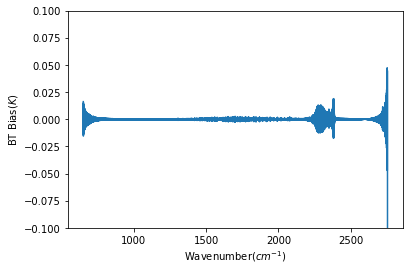

In [4]:
IBANDS_CRIS = [0, ]

spec_lbl2iasi, wavenumber_lbl2iasi = list(), list()
spec_lbl2cris, wavenumber_lbl2cris = list(), list()
spec_iasi2cris, wavenumber_iasi2cris = list(), list()

tbb_lbl2iasi, tbb_lbl2cris, tbb_iasi2cris = list(), list(), list()

for iband in IBANDS_CRIS:
    spec_lbl2iasi_band, wavenumber_lbl2iasi_band, plot_data_lbl2iasi_band = lbl2other(
        spec_lbl, LBL_BEGIN_FREQUENCY, LBL_END_FREQUENCY, LBL_FREQUENCY_INTERVAL,
        IASI_BAND_F1[iband], IASI_BAND_F2[iband], IASI_D_FREQUENCY[iband],
        IASI_F_NYQUIST, IASI_RESAMPLE_MAXX[iband], IASI_FILTER_WIDTH[iband],
        iasi_apod,
    )
    spec_lbl2iasi = np.append(spec_lbl2iasi, spec_lbl2iasi_band)
    wavenumber_lbl2iasi = np.append(wavenumber_lbl2iasi, wavenumber_lbl2iasi_band)
    
    tbb_lbl2iasi_band = rad2tbb(spec_lbl2iasi_band, wavenumber_lbl2iasi_band)
    tbb_lbl2iasi = np.append(tbb_lbl2iasi, tbb_lbl2iasi_band)
#     plt.plot(wavenumber_lbl2iasi, tbb_lbl2iasi)
    
    spec_lbl2cris_band, wavenumber_lbl2cris_band, plot_data_lbl2cris_band = lbl2other(
        spec_lbl, LBL_BEGIN_FREQUENCY, LBL_END_FREQUENCY, LBL_FREQUENCY_INTERVAL,
        CRIS_BAND_F1[iband], CRIS_BAND_F2[iband], CRIS_D_FREQUENCY[iband],
        CRIS_F_NYQUIST, CRIS_RESAMPLE_MAXX[iband], CRIS_FILTER_WIDTH[iband],
        cris_apod,
    )
    spec_lbl2cris = np.append(spec_lbl2cris, spec_lbl2cris_band)
    wavenumber_lbl2cris = np.append(wavenumber_lbl2cris, wavenumber_lbl2cris_band)
    
    tbb_lbl2cris_band = rad2tbb(spec_lbl2cris_band, wavenumber_lbl2cris_band)
    tbb_lbl2cris = np.append(tbb_lbl2cris, tbb_lbl2cris_band)
#     plt.plot(wavenumber_lbl2cris, tbb_lbl2cris)
    
    spec_iasi2cris_band, wavenumber_iasi2cris_band, plot_data_iasi2cris_band = ori2other(
        spec_lbl2iasi_band, IASI_BAND_F1[iband], IASI_BAND_F2[iband], IASI_D_FREQUENCY[iband],
        CRIS_BAND_F1[iband], CRIS_BAND_F2[iband], CRIS_D_FREQUENCY[iband],
        CRIS_F_NYQUIST, CRIS_RESAMPLE_MAXX[iband], CRIS_FILTER_WIDTH[iband],
        apodization_ori=iasi_apod, apodization_other=cris_apod,
    )
    
    spec_iasi2cris = np.append(spec_iasi2cris, spec_iasi2cris_band)
    wavenumber_iasi2cris = np.append(wavenumber_iasi2cris, wavenumber_iasi2cris_band)
    
    tbb_iasi2cris_band = rad2tbb(spec_iasi2cris_band, wavenumber_iasi2cris_band)
    tbb_iasi2cris = np.append(tbb_iasi2cris, tbb_iasi2cris_band)
    
#     plt.plot(wavenumber_iasi2cris, tbb_iasi2cris)
#     spec_bias_iasi2cris_lbl2_cris_band = spec_iasi2cris_band - spec_lbl2cris_band
#     plt.plot(wavenumber_lbl2cris_band, spec_bias_iasi2cris_lbl2_cris_band)
#     plt.ylim(-0.1, 0.1)
    
    tbb_bias_iasi2cris_lbl2_cris_band = tbb_iasi2cris_band - tbb_lbl2cris_band
    plt.plot(wavenumber_lbl2cris_band, tbb_bias_iasi2cris_lbl2_cris_band)
    plt.ylim(-0.1, 0.1)
    plt.xlabel('Wavenumber($cm^{-1}$)')
    plt.ylabel('BT Bias($K$)')
    idx = np.where(np.logical_or(tbb_bias_iasi2cris_lbl2_cris_band < -0.02, tbb_bias_iasi2cris_lbl2_cris_band > 0.02))
    print(idx)


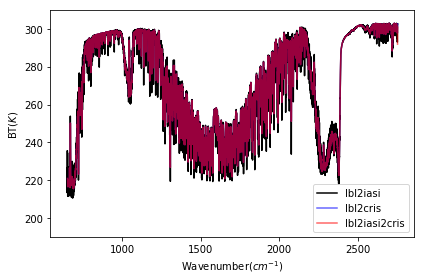

In [22]:
plt.plot(wavenumber_lbl2iasi, tbb_lbl2iasi, c='#000000', label='lbl2iasi')
plt.plot(wavenumber_iasi2cris, tbb_lbl2cris, c='b', alpha=0.6, label='lbl2cris')
plt.plot(wavenumber_iasi2cris, tbb_iasi2cris, c='r', alpha=0.6, label='lbl2iasi2cris')
plt.ylim(190, 310)
plt.xlabel('Wavenumber($cm^{-1}$)')
plt.ylabel('BT($K$)')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('lbl2cris_lbl2iasi2cris.png', dpi=200)

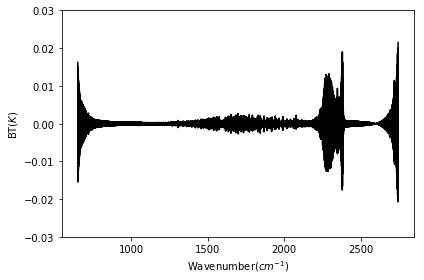

In [16]:
plt.plot(wavenumber_iasi2cris[:-15], (tbb_iasi2cris - tbb_lbl2cris)[:-15], c='#000000', alpha=1, label='lbl2cris')
plt.ylim(-0.03, 0.03)
plt.xlabel('Wavenumber($cm^{-1}$)')
plt.ylabel('BT($K$)')
plt.tight_layout()
plt.savefig('lbl2cris_lbl2iasi2cris_bias.png', dpi=200)

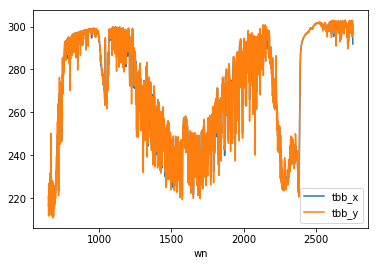

In [14]:
tbb_iasi2cris_pd = pd.Series(tbb_iasi2cris)
tbb_lbl2iasi_pd = pd.Series(tbb_lbl2iasi)
wavenumber_iasi2cris_pd = pd.Series(wavenumber_iasi2cris)
wavenumber_lbl2iasi_pd = pd.Series(wavenumber_lbl2iasi)


data_iasi2cris = {'wn': wavenumber_iasi2cris, 'tbb': tbb_iasi2cris}
iasi2cris = pd.DataFrame(data=data_iasi2cris)

data_lbl2iasi = {'wn': wavenumber_lbl2iasi, 'tbb': tbb_lbl2iasi}
lbl2iasi = pd.DataFrame(data=data_lbl2iasi)

iasi_cris_merge = pd.merge(iasi2cris, lbl2iasi, left_on='wn',right_on='wn')

iasi_cris_merge.plot(x='wn', y=['tbb_x', 'tbb_y'])

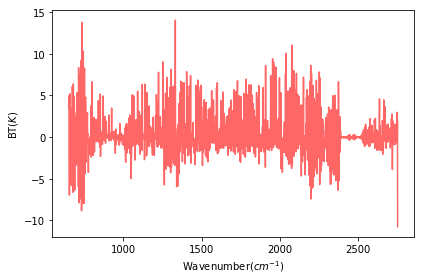

In [20]:
plt.plot(iasi_cris_merge['wn'], iasi_cris_merge['tbb_x'] - iasi_cris_merge['tbb_y'], c='r', alpha=0.6, label='lbl2iasi2cris')
# plt.ylim(-0.03, 0.03)
plt.xlabel('Wavenumber($cm^{-1}$)')
plt.ylabel('BT($K$)')
plt.tight_layout()
plt.savefig('lbl2cris_lbl2iasi2cris_bias2.png', dpi=200)